# Cross-Validation Exercises

In [100]:
import matplotlib.pyplot as plt 
import pandas as pd

In [101]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote.pickle -P ../data
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/banknote_noisy.pickle -P ../data


import pickle
import numpy as np

from dataclasses import dataclass

@dataclass
class BanknotesDataset:
    Description: str
    Attributes: list()
    Targets: list()
    X: np.array
    Y: np.array

def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

dataset = load_dataset('../data/banknote_noisy.pickle')



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/shegenbart/]870 files                0% [<=>                           ]       0          B/s87[Files: 0  Bytes: 0  [0 B/s] Re]87[https://raw.githubusercontent.]870 files                0% [ <=>                          ]       0          B/s87banknote.pickle.2    100% [=============================>]   49.01K    --.-KB/s87[Files: 1  Bytes: 49.01K [63.49]8

7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://github.com/shegenbart/]870 files                0% [<=>                           ]       0          B/s87[Files: 0  Bytes: 0  [0 B/s] Re]870 files                0% [ <=>                          ]       0          B/s87[https://raw.githubusercontent.]87banknote_noisy.pickl 100% [=============================>]   49.03K    --.-KB/s87[Files: 1  Bytes: 49.03K [71.47]8

In [102]:
print(dataset.Description)

Noisy Version! Data were extracted from images that were taken
from genuine and forged banknote-like specimens.
For digitization, an industrial camera usually
used for print inspection was used. The final
images have 400x 400 pixels. Due to the object
lens and distance to the investigated object
gray-scale pictures with a resolution of about
660 dpi were gained. Wavelet Transform tool were
used to extract features from images.


## Exercise 1:

In this exercise we will study the effect of training a ML model using the training data. Because all our methods aim to find a model that works as good as possible on our training data, we often get an unrealistically high score on our training data.

* Inspect the banknote-fraud dataset stored in ```dataset```.
* Train a decision tree classifier and predict the accuracy of all data using the ```accuracy_score()``` function.
* Discuss the results, is it realistic?

In [103]:
dataset.X.shape

(1372, 4)

In [104]:
pd.DataFrame(dataset.X)

,0,1,2,3
0,2.392097,7.377762,-1.309684,-1.909201
1,4.987971,9.209283,1.171465,0.278670
2,3.069127,0.090559,1.103164,-0.604826
3,4.566408,12.669748,-2.499550,-3.356163
4,1.764492,-5.275010,3.172741,-1.413929
...,...,...,...,...
1367,-0.992391,0.234414,-1.981034,1.199523
1368,-0.251063,-10.231010,10.081752,1.243856
1369,-6.809959,-11.858423,14.950261,-2.333518
1370,-4.949187,-12.058904,10.943232,-1.746224


In [105]:
pd.DataFrame(dataset.X).describe()

,0,1,2,3
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.429965,1.921197,1.379320,-1.167844
std,3.256771,6.578724,4.742754,2.357992
min,-8.689261,-19.867578,-9.564703,-9.577753
25%,-1.938486,-2.624538,-1.841298,-2.495843
50%,0.465732,2.136538,0.816269,-0.743799
75%,2.874721,6.784955,3.661402,0.537529
max,8.274221,18.744145,19.639731,5.059831


In [106]:
from sklearn import tree

In [107]:
clf_1 = tree.DecisionTreeClassifier()
X = dataset.X
Y = dataset.Y
clf_1 = clf_1.fit(X, Y)

In [108]:
Y_pred = clf.predict(dataset.X)

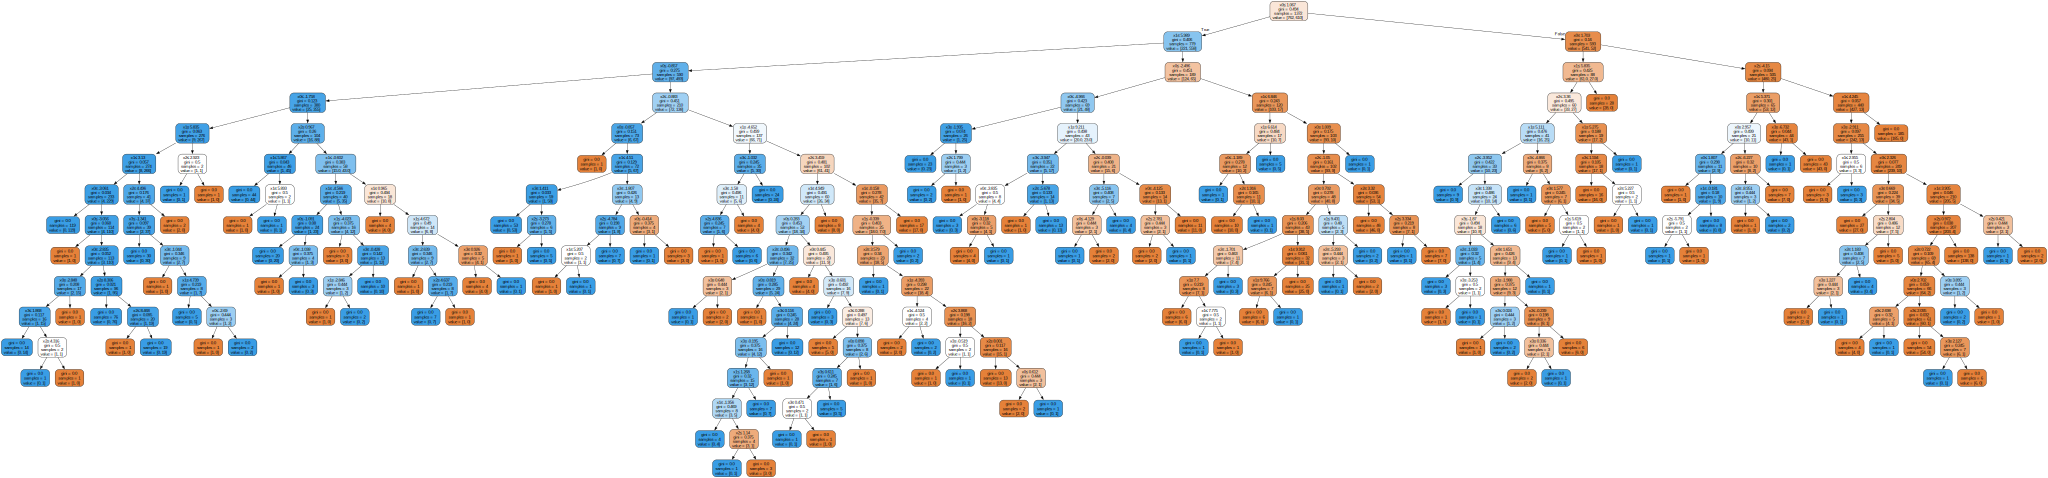

In [109]:
import graphviz
dot_data = tree.export_graphviz(clf_1, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(Y,Y_pred)

1.0

## Exercise 2:

In the previous exercise we saw that using the same data to evaluate a model that was used to optimize a method gives unrealistically high scores. Instead we have to hold back on some of the data during training and use this held-back data to perform the evaluation.

* Create a test-train split of the banknote-fraud dataset (```dataset```) using the ```train_test_split()``` function from sklearn.
* Train another decision tree on the *train* portion and evaluate it's accuracy (```accuracy_score()```) on the *test* portion.

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [114]:
print(f"X Train shape: \t{X_train.shape}\nX Test shape: \t{X_test.shape}\nY Train shape: \t{y_train.shape}\nY Test shape: \t{y_test.shape}")

X Train shape: 	(1029, 4)
X Test shape: 	(343, 4)
Y Train shape: 	(1029,)
Y Test shape: 	(343,)


In [115]:
clf_1 = tree.DecisionTreeClassifier()
X = X_train
Y = y_train
clf_1 = clf_1.fit(X, Y)

In [116]:
Y_test_pred = clf_1.predict(X_test)

In [117]:
accuracy_score(y_test,Y_test_pred)

0.8338192419825073

### With random state shuffeling

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 987654321)

In [119]:
clf_2 = tree.DecisionTreeClassifier()
X = X_train
Y = y_train
clf_2 = clf_2.fit(X, Y)

Y_test_pred = clf_2.predict(X_test)

accuracy_score(y_test,Y_test_pred)

0.872093023255814

## Exercise 3:

There is a nice trick to know to check if your code or your validation are somewhat flawed. Shuffle your labels randomly, then train your classifier with the suffled labels. What performance would you expect from a *fair* classifier?

* Shuffle your training labels (```np.random.shuffle()```)
* Train a classifier, what accuracy would you expect?
* Validate on your test set.

In [120]:
y_train_shuffeled = np.copy(y_train)

In [121]:
np.random.shuffle(y_train_shuffeled)

In [122]:
clf_3 = tree.DecisionTreeClassifier()
X = X_train
Y = y_train_shuffeled
clf_3 = clf_3.fit(X, Y)

Y_test_pred_shuffeled = clf_3.predict(X_test)

accuracy_score(y_test,Y_test_pred_shuffeled)

0.5503875968992248

### Exercise 4:

Let's use scikit-learn's implementation of cross-cross_validate (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

* Perform cross-validation using the ```cross_validate()``` function in a 10-fold cross-validation.  
* Report the mean and standard deviation of your results.
* Experiment with the number of folds (in k-fold cross validation), how does it influence your mean and standard deviation?

In [123]:
from sklearn.model_selection import cross_validate

In [161]:
validation = cross_validate(clf_2, dataset.X, dataset.Y, cv = 100)

In [162]:
pd.DataFrame(validation)

,fit_time,score_time,test_score
0,0.009308,0.001206,0.857143
1,0.008883,0.000670,0.928571
2,0.009360,0.001013,0.857143
3,0.010365,0.001062,0.714286
4,0.010180,0.000904,0.928571
...,...,...,...
95,0.010589,0.000918,0.538462
96,0.010539,0.000940,0.769231
97,0.011123,0.001342,0.923077
98,0.010871,0.000924,0.615385


In [163]:
pd.DataFrame(validation).describe()

,fit_time,score_time,test_score
count,100.000000,100.000000,100.000000
mean,0.007240,0.000565,0.839011
std,0.002509,0.000270,0.098247
min,0.004358,0.000297,0.538462
25%,0.004755,0.000312,0.785714
50%,0.006577,0.000459,0.857143
75%,0.009538,0.000731,0.923077
max,0.012138,0.001342,1.000000


### Exercise 5:

* Train a decision tree classifier for the banknotes dataset (it should already be loaded in the ```dataset``` variable), compute and visualize the confusion matrix.
* Compute the accuracy, specificity, recall and precision in a 10 fold cross-validation and report the mean and standard deviation of each.

**Hints:**

1. Implement each measure as a function with a prototype like this:
```python
def accuracy(Y_pred, Y_real):
        pass
```

2. Use a confusion matrix to compute the true-positives, true-negatives, false-positives and false-positives.
3. ```cross_validate()``` accepts a parameter ```scoring```which accepts a dictionary of callables, use **lambdas** to  define your individual scorers.

In [ ]:
m = dict()
m["scores"] = lambda clf,x,y: sensitivity(clf.predict(x), y)